# Computational Methods in Ordinary Differential Equations

## Euler Method Applied to Solve Systems of Ordinary Differential Equations

The Euler method can be applied to solve a system of $N$ Ordinary Differntial Equations (ODE) of the form

\begin{align*}
    y_1' &= f_1(t, y_1), \\
    y_2' &= f_2(t, y_2), \\
    &\vdots \\
    y_N' &= f_N(t, y_N).
\end{align*}

Let $\mathbf{y} = (y_1, y_2, \ldots, y_N)$ and $F(t, \mathbf{y}) = (f_1(t, y_1), f_2(t, y_2), \ldots, f_N(t, y_N))$ then we can write the system in vector form

$$ \mathbf{y}' = F(t, \mathbf{y})$$

The Euler method for solving this ODE in vector form is

$$ \mathbf{y}_{n+1} = \mathbf{y}_n + hF(t, \mathbf{y}).$$

#### Example
The code below solves the following IVP over the domain $t\in[0, 5]$

\begin{align*}
    y_1' &= y_2, & y_1(0) &= 0, \\
    y_2' &= -g, & y_2(0) &= 20,
\end{align*}

where $g=9.81$ms$^{-2}$ is the acceleration due to gravity.

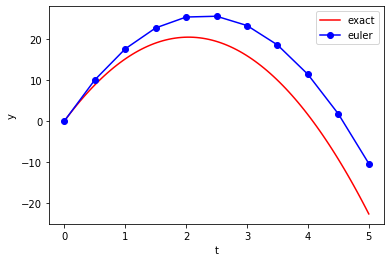

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def euler(tspan, y0, h):
    """
    This function calculates the solution to the following IVP using the Euler method
    
            y'(t) = f(t, y(t)), tspan = [tmin, tmax], y(tmin) = y0
    """     
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros((nsteps + 1, 1))
    y = np.zeros((nsteps + 1, len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0
    
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        t[n+1] = t[n] + h
    
    return t, y


def f(t, y):
    """
    This function defines the system of ODEs to be solved
    """
    dy = np.zeros(y.shape)
    dy[0] = y[1]
    dy[1] = -g
    
    return dy


# Define variables
g = 9.81
tspan = [0, 5]
y0 = [0, 20]
h = 0.5

# Solve IVP using the Euler method
t, y = euler(tspan, y0, h)

# Plot numerical and exact solutions
texact = np.linspace(tspan[0], tspan[1], 100)
yexact = 20 * texact - 0.5 * g * texact**2

fig, ax = plt.subplots()

ax.plot(texact, yexact, 'r-', label='exact')
ax.plot(t, y[:,0], 'bo-', label='euler')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.legend()

plt.show()

<font size="2"><i>Dr Jon Shiach, Department of Computing and Mathematics, Manchester Metropolitan University</i></font>